In [183]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [184]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- The TRAIN data contains the sale price that we can use to compare data to

In [186]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [187]:
y = pd.DataFrame(train_data.SalePrice)

In [188]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [189]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [190]:
features = [#'Id', 
        'MSSubClass', 
        #'MSZoning', 
        'LotFrontage', 'LotArea', 
        #'Street',
        # 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        # 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       # 'HouseStyle', 
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       # 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 
       # 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       # 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       # 'BsmtFinSF1',
       # 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', 
       # 'Heating',
       # 'HeatingQC', 
       # 'CentralAir', 'Electrical', 
       '1stFlrSF', '2ndFlrSF',
       # 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       # 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 
       # 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       # 'GarageYrBlt', 'GarageFinish', 
       'GarageCars', 'GarageArea', 
       # 'GarageQual',
       # 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       # 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       # 'Fence', 'MiscFeature', 'MiscVal', 
       'MoSold', 'YrSold', 
       # 'SaleType',
       # 'SaleCondition'
       'SalePrice'
]

In [191]:

X = pd.DataFrame(train_data[features])
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,856,856,854,8,2,548,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,6,2,460,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,920,920,866,6,2,608,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,756,961,756,7,3,642,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,1145,1145,1053,9,3,836,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,953,953,694,7,2,460,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,1542,2073,0,7,2,500,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,1152,1188,1152,9,1,252,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,1078,1078,0,5,1,240,4,2010,142125


In [192]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,346.992466,6.517808,1.767123,472.980137,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,438.705324,386.587738,436.528436,1.625393,0.747315,213.804841,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,5.000000,1.000000,334.500000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,0.000000,6.000000,2.000000,480.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,1298.250000,1391.250000,728.000000,7.000000,2.000000,576.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,14.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


In [193]:
X.isna().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

Text(0, 0.5, 'Count')

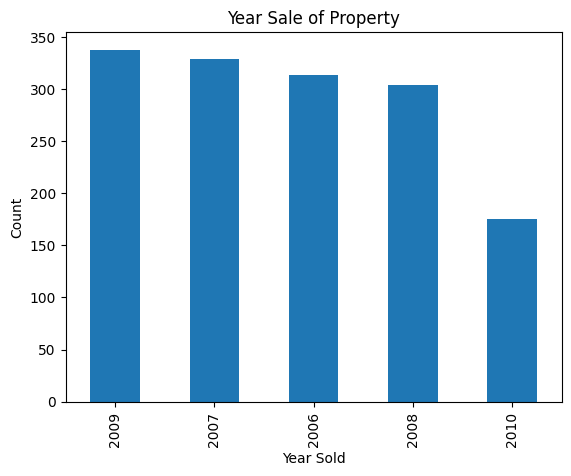

In [194]:
ax = X['YrSold'].value_counts().head(10).plot(kind='bar', title='Year Sale of Property')
ax.set_xlabel("Year Sold")
ax.set_ylabel("Count")

<Axes: title={'center': 'LotArea Distribution'}, ylabel='Frequency'>

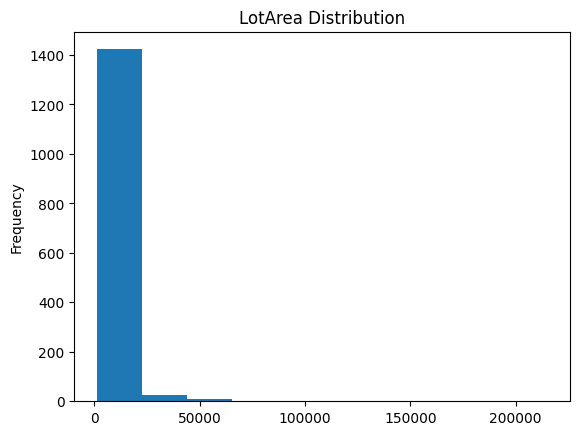

In [195]:
X['LotArea'].plot(kind='hist', title="LotArea Distribution")

<Axes: title={'center': 'LotArea Distribution'}, ylabel='Frequency'>

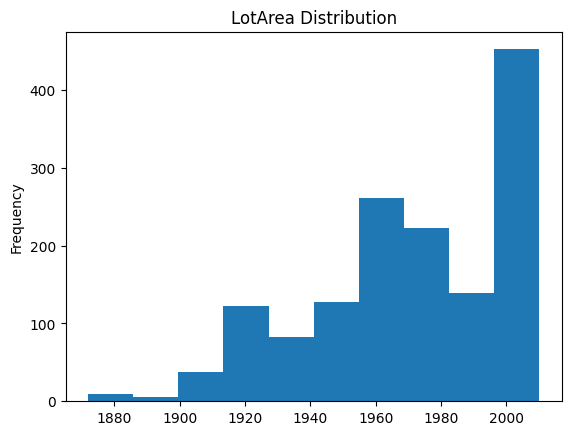

In [196]:
X['YearBuilt'].plot(kind='hist', title="LotArea Distribution")

<Axes: xlabel='LotArea', ylabel='LotFrontage'>

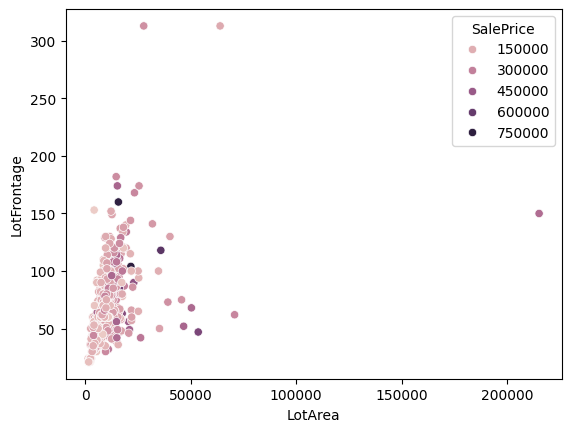

In [197]:
sns.scatterplot(x='LotArea', y='LotFrontage', hue='SalePrice', data=X)

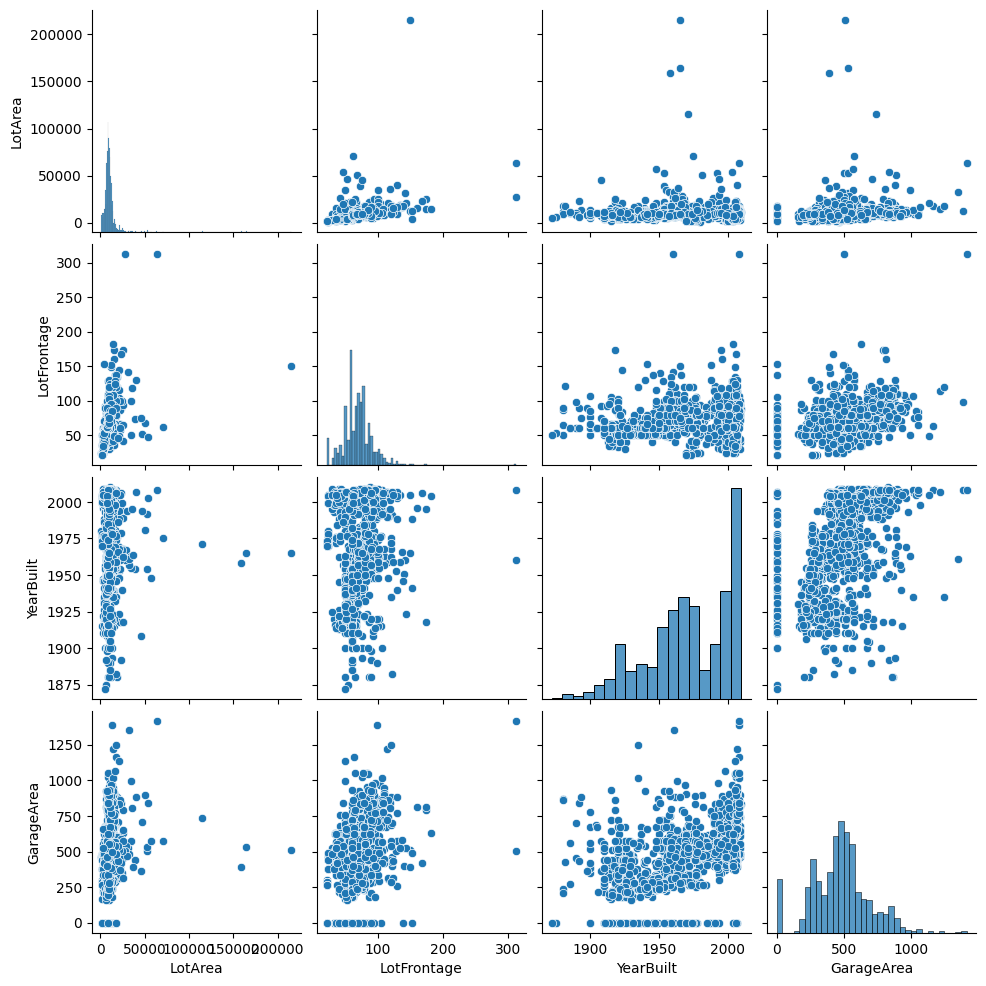

In [217]:
sns.pairplot(vars=['LotArea', 'LotFrontage', 'YearBuilt', 'GarageArea'], data=X)

In [ ]:
X[['LotArea', 'LotFrontage', '']]

In [199]:

from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(random_state=1)

model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [200]:
print(X.head())
print(model.predict(X.head()))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  TotRmsAbvGrd  \
0          2003       196.0          856       856       854             8   
1          1976         0.0         1262      1262         0             6   
2          2002       162.0          920       920       866             6   
3          1970         0.0          756       961       756             7   
4          2000       350.0         1145      1145      1053             9   

   GarageCars  GarageArea  MoSold  YrSold  SalePrice  
0           2      

In [201]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.3, test_size=0.7, random_state=1)

In [202]:
from sklearn.metrics import mean_absolute_error, roc_auc_score


model = DecisionTreeRegressor()


model.fit(X_train, y_train)
preds = model.predict(X_valid)
mean_absolute_error(y_valid, preds)

np.float64(1789.0939334637965)

In [203]:
def getmae(max_leaves, trainX, trainy, validX, validy):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, random_state=1)
    model.fit(trainX, trainy)
    preds = model.predict(validX)
    mae = mean_absolute_error(validy, preds)
    return mae

In [204]:
for i in [30, 35, 40, 45]:
    print("Max Leaves: %d \t\tMAE: %.2f" %(i, getmae(i, X_train, y_train, X_valid, y_valid)))

Max Leaves: 30 		MAE: 3936.16
Max Leaves: 35 		MAE: 3611.69
Max Leaves: 40 		MAE: 3310.29
Max Leaves: 45 		MAE: 3034.59


In [205]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

fst_model = RandomForestRegressor(random_state=1)
fst_model.fit(X_train, y_train)
preds = fst_model.predict(X_valid)
mean_squared_error(y_valid, preds)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


np.float64(30671269.584352728)

In [206]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_leaf_nodes': [100, 125, 150, 175],
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [50, 100, 150, 200]
}

gscv = GridSearchCV(estimator=fst_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
gscv.fit(X_train, y_train.values.ravel())
bestparams = gscv.best_params_
bestparams

KeyboardInterrupt: 

In [172]:
optim_model = RandomForestRegressor(**bestparams, random_state=1)
optim_model.fit(X_train, y_train)
opreds = optim_model.predict(X_valid)
print("base MSE : %.2f\n" %(mean_squared_error(y_valid, preds)))
print("optim MSE : %.2f\n" %(mean_squared_error(y_valid, opreds)))
print("base MSE : %.2f\n" %(mean_absolute_error(y_valid, preds)))
print("optim MSE : %.2f\n" %(mean_absolute_error(y_valid, opreds)))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


base MSE : 35800104.99

optim MSE : 31547445.33

base MSE : 1350.40

optim MSE : 1287.82



In [173]:
sample = pd.DataFrame({"Id" : test_data.Id, "SalePrice" : fst_model.predict(test_data[features])})

sample.to_csv('submission.csv', index=False)

KeyError: "['SalePrice'] not in index"